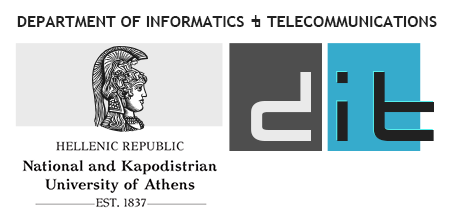
# **Data Mining Techniques - Project 2 - Spring Semester 2023**
**Papasotiri Christina - 1115201900151**

# Preprocessing

In [1]:
import sys
import pandas as pd
import numpy as np

## Insert data from books_1.Best_Books_Ever.csv file

In [2]:
df = pd.read_csv('books_1.Best_Books_Ever.csv')
df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

## Check & Handle NaN Data

Υπάρχουν διάφορες στήλες που περιέχούν NaN values όμως θεωρώ ότι μόνο η στήλη description χρειάζεται κατάλληλο χειρισμό:

In [3]:
# check for NaN values
if (df['description'].isnull().values.any() == True):
  # drop them & reset indexing
  df = df.dropna(subset=['description']).reset_index(drop=True)
print(df['description'].isnull().values.any())
df

False


,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51135,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
51136,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
51137,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
51138,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

## Split ratingsByStars column values to 5 new columns

In [4]:
def convert_str_to_int(columnName):
  """ convert dataframe column from string to integer """
  df[columnName] = pd.to_numeric(df[columnName], errors='coerce')     # convert string to float
  df[columnName] = df[columnName].replace(np.nan, 0, regex=True)      # check to replace NaN values by 0 
  df[columnName] = df[columnName].astype(int)                         # convert float to int 

In [5]:
# split ratingsByStars column into 5 new columns
df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']] = df['ratingsByStars'].str.split(",", expand = True)

# convert object to string
df = df.astype({'ratingStar5':'string', 'ratingStar4':'string', 'ratingStar3':'string', 'ratingStar2':'string', 'ratingStar1':'string'})

# remove unwanted characters ( ', [, ] )
df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']] = df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']].replace({"'" : ""}, regex=True)
df['ratingStar5'] = df['ratingStar5'].str.replace('\[', '', regex=True)
df['ratingStar1'] = df['ratingStar1'].str.replace('\]', '', regex=True)

# convert strings to ints
convert_str_to_int('ratingStar5')
convert_str_to_int('ratingStar4')
convert_str_to_int('ratingStar3')
convert_str_to_int('ratingStar2')
convert_str_to_int('ratingStar1')

# drop unnecessary column 
df.drop(columns = ['ratingsByStars'])

df.loc[:, ['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']]

,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1
0,3444695,1921313,745221,171994,93557
1,1593642,637516,222366,39573,14526
2,2363896,1333153,573280,149952,80794
3,1617567,816659,373311,113934,76770
4,1751460,1113682,1008686,542017,548674
...,...,...,...,...,...
51135,311,310,197,42,11
51136,16,14,5,2,0
51137,2109,1868,1660,647,390
51138,77,78,59,19,5


## Split book genres and keep the first genre only 

In [6]:
# split book genres and keep the 1st genre as string
df['genreSingle'] = df['genres'].str.split(",", n=0, expand=True)[0]
df['genreSingle'] = df['genreSingle'].str.replace('\[', '', regex=True)
df['genreSingle'] = df['genreSingle'].str.replace("'", '', regex=True)
df['genreSingle'] = df['genreSingle'].astype('string')

# check for books without any genre information
if (df['genreSingle'].isnull().values.any() == True):
  # drop them & reset indexing
  df = df.dropna(subset=['genreSingle']).reset_index(drop=True)
df['genreSingle'] 

0        Young Adult
1            Fantasy
2           Classics
3           Classics
4        Young Adult
            ...     
51135       Vampires
51136        Mystery
51137        Fantasy
51138        Fiction
51139    Lds Fiction
Name: genreSingle, Length: 51140, dtype: string

## Extract publishYear from publishDate

In [7]:
# Convert 'publishDate' to datetime format
df['publishDate'] = pd.to_datetime(df['publishDate'], errors='coerce')

# Drop rows with NaT values in 'publishDate'
df = df.dropna(subset=['publishDate']).reset_index(drop=True)

# Dalete rows based on unexpected values
# df = df[df['publishYear'].str.contains("publi|book|Books|vote|Great") == False].reset_index(drop=True)

# extract year from publishDate
df['publishYear'] = df['publishDate'].dt.year

df.loc[:, ['publishYear', 'publishDate']]

/tmp/ipykernel_29510/1257791816.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['publishDate'] = pd.to_datetime(df['publishDate'], errors='coerce')


,publishYear,publishDate
0,2008,2008-09-14
1,2004,2004-09-28
2,2006,2006-05-23
3,2000,2000-10-10
4,2006,2006-09-06
...,...,...
49684,2011,2011-05-28
49685,2011,2011-08-05
49686,2011,2011-03-18
49687,2011,2011-09-01


# Data Inspection

## Histogram of ratings

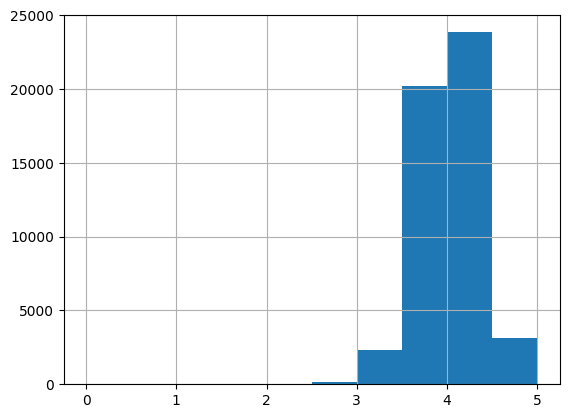

In [8]:
hist = df['rating'].hist()

## The 10 books with the most pages

In [9]:
# check for NaN values
if (df['pages'].isnull().values.any() == True):
  df = df.dropna(subset=['pages']).reset_index(drop=True)
# convert objects to ints 
df = df.astype({'pages':'string'})
convert_str_to_int('pages')

pages_idxs = df['pages'].nlargest(10).index
df.loc[pages_idxs, ['title', 'pages']]

,title,pages
11197,The Story of Civilization,14777
21764,The Complete Wheel of Time,11095
8192,The Complete Malazan Book of the Fallen,8258
4999,Animorphs,8245
19248,Homestuck,8124
3103,Worm,6680
4610,The Complete Aubrey/Maturin Novels (5 Volumes),6576
13833,البداية والنهاية,6088
1662,A Song of Ice and Fire,5216
35917,One Piece Box Set 3: Thriller Bark to New Worl...,5056


## How many books are published per year?

In [10]:
pd.set_option('display.max_rows', None)
df.groupby('publishYear')['publishYear'].count()

publishYear
1820       1
1873       1
1880       1
1884       1
1887       1
1888       1
1892       1
1896       1
1900       2
1907       1
1908       1
1911       1
1912       1
1913       1
1920       2
1921       1
1922       1
1923       2
1924       1
1925       1
1926       1
1927       3
1928       1
1929       1
1931       2
1933       1
1934       1
1935       3
1936       2
1937       5
1938       1
1939       3
1940       2
1941       6
1942       1
1943       2
1944       1
1945       2
1946       1
1948       6
1949       3
1950       6
1951       3
1952       7
1953       6
1954      10
1955       9
1956       7
1957       6
1958      10
1959      16
1960      11
1961      19
1962      25
1963      14
1964      25
1965      23
1966      30
1967      27
1968      41
1969      46
1970      38
1971      45
1972      62
1973      62
1974      66
1975      61
1976      71
1977      92
1978      79
1979      78
1980      80
1981     107
1982     118
1983     145
1984     151


In [11]:
pd.reset_option("display")

## The 10 author who have published the most books:

In [12]:
# check for NaN values
if (df['author'].isnull().values.any() == True):
  df = df.dropna(subset=['author']).reset_index(drop=True)
# df = df.astype({'author':'string'})
df.groupby('author')['author'].count().nlargest(10)

author
Nora Roberts (Goodreads Author)       82
Agatha Christie                       69
Stephen King (Goodreads Author)       63
Erin Hunter                           53
Bella Forrest (Goodreads Author)      52
Meg Cabot (Goodreads Author)          51
Karen Kingsbury (Goodreads Author)    48
Terry Pratchett                       48
Bonnie Bryant                         46
Lucian Bane (Goodreads Author)        42
Name: author, dtype: int64

## The 10 author who have published the most books:

In [13]:
# check for NaN values
if (df['publisher'].isnull().values.any() == True):
  df = df.dropna(subset=['publisher']).reset_index(drop=True)
df.groupby('publisher')['publisher'].count().nlargest(10)

publisher
Vintage                                        568
HarperCollins                                  543
Penguin Books                                  423
Ballantine Books                               388
Bantam                                         364
Createspace Independent Publishing Platform    354
Avon                                           311
Pocket Books                                   310
Berkley                                        283
Del Rey                                        283
Name: publisher, dtype: int64

# Implementation of Recommentation System

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
tfidf_vectoroizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix = tfidf_vectoroizer.fit_transform(df[df['language'] == 'English']['description'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def recommend(item_id, num):
    book_idx = df[df['bookId'] == item_id].index[0]
    similar_books = list(enumerate(cosine_sim[book_idx]))
    similar_books = sorted(similar_books, key=lambda x: x[1], reverse=True)
    similar_books = similar_books[1:num+1]
    print(f"Recommending {num} books similar to: {df.loc[book_idx, 'title']}")
    print("-" * 50)
    for idx, sim_score in similar_books:
        print(f"Recommended: {df.loc[idx, 'title']}")
        print(f"Description: {df.loc[idx, 'description']}")
        print(f"(score: {sim_score})")
        print("-" * 50)
    
# recommend(11330278-wayward-son, 5)

KeyboardInterrupt: 

In [ ]:
df['bookId']

In [ ]:
df.info()